###Ahmad Aljarf

###Stock Market Prediction And Forecasting Using Stacked LSTM

###LetsGrowMore

###Batch: January 2023

Lets import the required libraries

In [ ]:
import pandas as pd

url='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

df1=pd.read_csv(url)

df1

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


Plotting the close columns on a graph and setting it as index

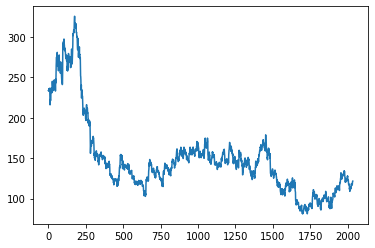

In [ ]:
import matplotlib.pyplot as plt


plt.plot(df1.reset_index()['Close'])

plt.show()

Applying a data preprocessing teachnique for scaling the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data_close = df1.reset_index()['Close']

scaler = MinMaxScaler(feature_range = (0, 1))
# after scaling the data reshape it
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))

Splitting the data into testing and training set

In [ ]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train, test = data_close[0 : train_size, :], data_close[train_size : len(data_close), :1]

In [ ]:
def create_matrix(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
step=100 
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1323, 100) (1323,)
(510, 100) (510,)


Reshape the data after splitting it

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Importing libraries to start setting and applying the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Now lets fit the model and lets check to loss for each epoch

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=77, batch_size=64, verbose=1, shuffle=True).history

Epoch 1/77
19/19 [==============================] - 11s 261ms/step - loss: 0.0161 - val_loss: 0.0034
Epoch 2/77
19/19 [==============================] - 4s 187ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 3/77
19/19 [==============================] - 4s 187ms/step - loss: 0.0017 - val_loss: 9.7756e-04
Epoch 4/77
19/19 [==============================] - 4s 186ms/step - loss: 0.0014 - val_loss: 9.2659e-04
Epoch 5/77
19/19 [==============================] - 4s 187ms/step - loss: 0.0014 - val_loss: 8.7862e-04
Epoch 6/77
19/19 [==============================] - 4s 187ms/step - loss: 0.0013 - val_loss: 8.7578e-04
Epoch 7/77
19/19 [==============================] - 4s 188ms/step - loss: 0.0013 - val_loss: 8.4124e-04
Epoch 8/77
19/19 [==============================] - 4s 185ms/step - loss: 0.0012 - val_loss: 7.6004e-04
Epoch 9/77
19/19 [==============================] - 4s 188ms/step - loss: 0.0011 - val_loss: 7.5759e-04
Epoch 10/77
19/19 [==============================] - 4s 187ms/step - lo

Making predictions

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 36ms/step


Lets reverse the the MinMac scaler

In [ ]:
# Reversing the MinMax Scaler
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


Lets calculate the mean squared error for model evaluation

In [ ]:
import math # MSE for the training set
from sklearn.metrics import mean_squared_error
mse_train=math.sqrt(mean_squared_error(y_train,train_predict))
mse_train


165.97205198325668

In [ ]:
mse_test=math.sqrt(mean_squared_error(y_test,test_predict)) # MSE for the testing set
mse_test

108.79688572348107

Now lets visualize the predictions

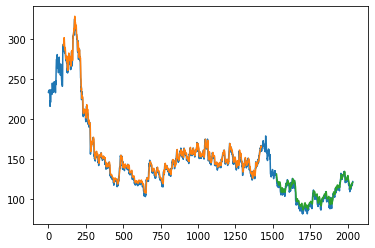

In [ ]:
### Visualize the Predictions
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

Green indicates the Predicted Data

Blue indicates the Complete Data

Orange indicates the Train Data

Future prediction model

In [ ]:
x_inum_pyut=test[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()

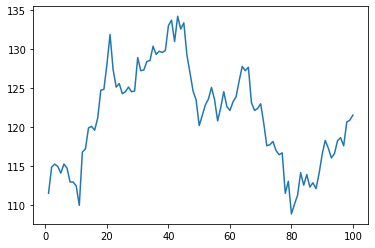

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]))